# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100


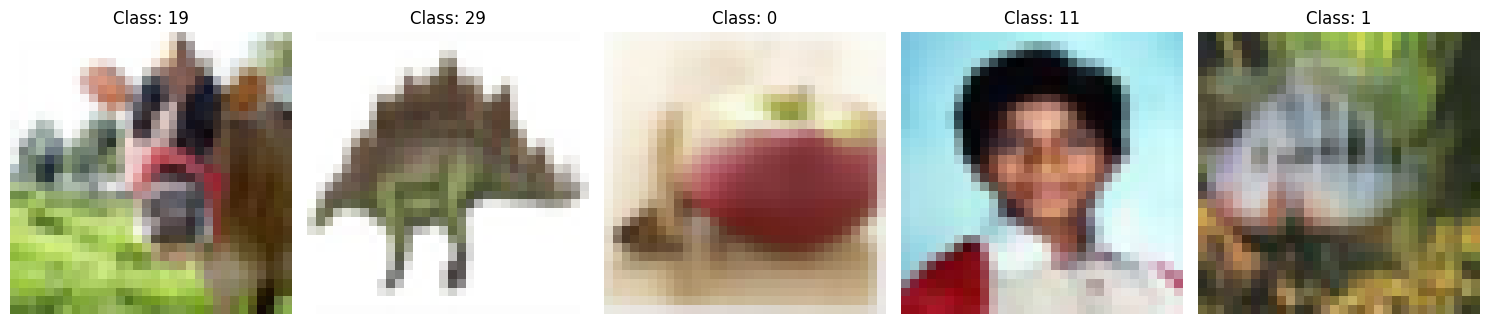

In [2]:
# Your code here
# Display dataset information
import matplotlib.pyplot as plt
import numpy as np
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Visualize some training images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {y_train[i][0]}")
    ax.axis('off')
plt.tight_layout()
plt.show()






### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print shapes of new splits
print(f"Training data shape: {x_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Validation labels shape: {y_val.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (40000, 32, 32, 3)
Validation data shape: (10000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Initialize the model
model = Sequential()

# Add convolutional layers and max-pooling layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for the dense layers
model.add(Flatten())

# Add dense (fully connected) layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(100, activation='softmax'))  # Output layer for 100 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ___categorical_crossentropy___

The categorical_crossentropy loss is  a commonly used loss function for multi-class classification problems, especially when the target labels are one-hot encoded.
designed for multi-class classification problems, where each class is mutually exclusive, and you want to assign a single class to each input


- <b>Optimizer:</b> ___adam___

The adam optimizer is widely used because it combines the advantages of both SGD and RMSprop, making it efficient and adaptive to different learning rates for each parameter.
It often leads to faster convergence and better results without needing extensive hyperparameter tuning.


In [5]:
from keras import optimizers

# Your code here
from keras import optimizers

# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),  # Default learning rate for Adam
    loss='categorical_crossentropy',         # Suitable for multi-class problems
    metrics=['accuracy']                            # Track accuracy during training
)

# Model is now ready for training


## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [ ]:


# Train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=32,                   # Batch size of 32
    epochs=20,                       # Number of epochs (adjust as needed)
    validation_data=(x_val, y_val),  # Use validation set during training
    verbose=1                        # Print training progress
)

# Explanation for the Number of Epochs:
# Choice of 20 epochs:
# - Starting with 20 epochs allows the model enough iterations to learn patterns in the dataset without overfitting.
# - You can increase or decrease the number of epochs based on the model's performance on the validation set
#   (e.g., if the validation accuracy plateaus or validation loss increases, the model might be overfitting).


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.0380 - loss: 4.3500 - val_accuracy: 0.1588 - val_loss: 3.5369
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1492 - loss: 3.5901 - val_accuracy: 0.2377 - val_loss: 3.1300
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2100 - loss: 3.2306 - val_accuracy: 0.2815 - val_loss: 2.8882
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2553 - loss: 2.9807 - val_accuracy: 0.3148 - val_loss: 2.7497
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2878 - loss: 2.8048 - val_accuracy: 0.3351 - val_loss: 2.6134
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.3173 - loss: 2.6778 - val_accuracy: 0.3534 - val_loss: 2.5499
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3439 - loss: 2.5289 - val_accuracy: 0.3583 - val_loss: 2.5308
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3656 - loss: 2.4164 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ___40%___
- <b>Other metric:</b> ___F1-score___
- <b>Reason for selection:</b> ___The F1-score is selected because it accounts for both precision and recall, making it a good choice for imbalanced datasets where accuracy may not fully represent model performance.__
- <b>Value of metric:</b> __40%____
- <b>Interpretation of metric value:</b>

If the accuracy is 40%, this means that 40% of the test samples were correctly classified by the model.
While a good accuracy value indicates a well-performing model, it may not reflect performance if there is a class imbalance, as accuracy could be artificially high if one class is dominant.
F1-score Interpretation:

An F1-score of 40% means that the model is somewhat  balanced in its performance. A value closer to 1 would indicate that the model is doing well in classifying both positive and negative classes.
If the F1-score is much lower than 1, it means that the model may be struggling with either false positives or false negatives.


In [ ]:
# Your code here


from sklearn.metrics import classification_report
import numpy as np


loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

# Convert the true labels from one-hot encoding to integer class labels (if needed)
yy_test = np.argmax(y_test, axis=1)  # Convert one-hot encoded to class labels

# If predictions are probabilities, convert them to class labels
yy_pred = np.argmax(model.predict(x_test), axis=1)  # Get the class with the highest probability

# Now we can use classification_report
print(classification_report(yy_test, yy_pred))


from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
yy_pred = model.predict(x_test)  # predicted labels

# Convert the predicted probabilities to class labels
yy_pred_classes = yy_pred.argmax(axis=1)

# Calculate accuracy
accuracy = accuracy_score(yy_test, yy_pred_classes)

# Calculate F1-score
f1 = f1_score(yy_test, yy_pred_classes, average='weighted')  # 'weighted' accounts for class imbalance

# Print results
print("Accuracy: ", accuracy)
print("F1-Score: ", f1)



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4105 - loss: 2.5767
Loss:     2.59
Accuracy: 40.42%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.67      0.66      0.66       100
           1       0.57      0.46      0.51       100
           2       0.24      0.24      0.24       100
           3       0.26      0.27      0.26       100
           4       0.13      0.14      0.14       100
           5       0.33      0.38      0.36       100
           6       0.55      0.41      0.47       100
           7       0.47      0.40      0.43       100
           8       0.54      0.49      0.51       100
           9       0.60      0.54      0.57       100
          10       0.22      0.29      0.25       100
          11       0.23      0.17      0.19       100
          12       0.34      0.41      0.37       100
          13       0.40      0.34      0.37       100
          14       0.37      0.25      0.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

The training accuracy and validation accuracy curves can tell us if the model is overfitting or underfitting

If the training accuracy is much higher than the validation accuracy, the model might be overfitting (i.e., it performs well on training data but poorly on unseen data).
If both the training and validation accuracy are low, the model might be underfitting (i.e., it is not learning enough patterns from the data).
 By examining an image the model classified correctly, we can see how well the model is able to identify patterns in the data. You should observe that the predicted probability is much higher for the correct class.

 For the incorrectly classified image, you might see that the predicted class has a low probability, indicating that the model was uncertain. In some cases, the model might be predicting a class that is similar to the correct class but not the same.

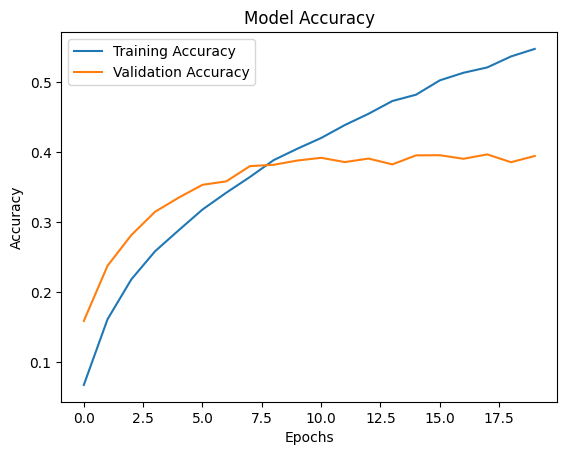

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


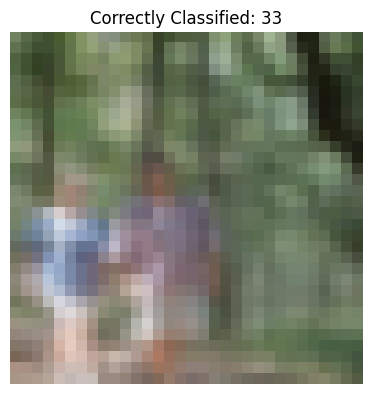

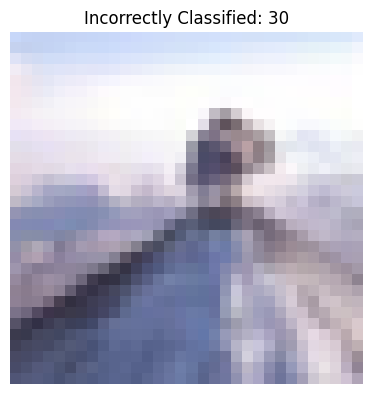

Predicted probabilities for the correct image:  [9.39135020e-07 4.18704622e-05 1.69732812e-04 2.15985416e-03
 4.63075441e-04 1.25817123e-05 2.21839236e-05 1.88490117e-06
 5.41854126e-04 8.01563438e-04 3.91568346e-06 1.19308796e-04
 2.11522658e-03 1.33722324e-05 1.20439072e-04 1.94433320e-03
 5.96965947e-05 5.11621738e-06 1.17146701e-03 3.23159620e-04
 5.11024396e-08 3.88485787e-05 1.49420134e-06 4.89359172e-06
 1.52071550e-07 6.27667527e-04 3.78105619e-06 2.58024363e-03
 1.23425616e-05 2.25774292e-03 1.31404101e-06 2.21555755e-02
 9.76367155e-05 8.40490103e-01 5.30843448e-04 3.58406990e-03
 4.74155531e-05 2.04566284e-03 3.87235894e-03 1.82562217e-03
 1.68537172e-05 2.54734605e-05 4.36314009e-03 2.95530281e-05
 4.49836167e-04 4.61496471e-04 1.59225689e-04 4.90391627e-04
 1.44673947e-07 8.43691339e-08 1.18006847e-03 1.44377351e-03
 1.86173311e-05 9.12658216e-09 7.53878612e-06 5.88416122e-04
 4.19420050e-03 6.66068445e-05 1.63083016e-07 1.50557107e-03
 3.08327088e-07 1.75304748e-07 1.3937

In [ ]:
# Your code here
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()



# Get predictions
# Get predictions
y_pred_prob = model.predict(x_test)  # Model predictions (probabilities)
y_pred_class = np.argmax(y_pred_prob, axis=1)  # Get the predicted class (index of max probability)

# Convert y_test to class labels (if it's one-hot encoded)
y_test_class = np.argmax(y_test, axis=1)

# Select an image that is correctly classified
correct_idx = np.where(y_pred_class == y_test_class)[0][0]  # Find an index where prediction is correct
incorrect_idx = np.where(y_pred_class != y_test_class)[0][0]  # Find an index where prediction is incorrect

# Plot correct prediction
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified: {y_pred_class[correct_idx]}")
plt.axis('off')
plt.show()

# Plot incorrect prediction
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified: {y_pred_class[incorrect_idx]}")
plt.axis('off')
plt.show()

# Print predicted probabilities for the correct and incorrect images
print("Predicted probabilities for the correct image: ", y_pred_prob[correct_idx])
print("Predicted probabilities for the incorrect image: ", y_pred_prob[incorrect_idx])

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.

Data augmentation can help improve generalization by artificially expanding the training dataset with transformations like rotation, zoom, flips, etc. This can help the model to learn more robust features.

Add more Convolutional layers: Sometimes deeper models perform better.
Sometimes the model needs more epochs to converge to a good solution


Using the EarlyStopping callback is an excellent way to prevent overfitting and reduce training time when the model stops improving on the validation set





- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:


from keras.models import Sequential
# Instead of importing from keras.layers.convolutional, import directly from keras.layers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D # Import MaxPooling2D from keras.layers
from keras.layers import Dense, Activation, Dropout, Flatten

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.initializers import RandomNormal, Constant
model = Sequential()

model.add(Conv2D(256,(3,3),padding='same',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization(momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)))
model.add(Dense(100,activation='softmax'))
model.summary()


# Data Augmentation
# Adding data augmentation for creating more images
# Divide train and validation set
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuration for creating new images
train_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

# X_train, X_validation, y_train, y_validation = train_test_split(train_images, train_labels, test_size=0.2, random_state=93)
train_datagen.fit(x_train)


# Configure the model for training
from tensorflow.keras import optimizers
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


# Training model
import time
training_start = time.time()
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=64),
          steps_per_epoch=100,
          epochs=350,
          validation_data=(x_val, y_val),
          verbose=1)
training_stop = time.time()
training_time = training_stop - training_start
print(f"Training time: {training_time}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 8, 8, 512)           │              

 Total params: 15,795,556 (60.26 MB)

 Trainable params: 15,786,340 (60.22 MB)

 Non-trainable params: 9,216 (36.00 KB)

Epoch 1/350


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 336ms/step - acc: 0.0217 - loss: 4.8993 - val_acc: 0.0087 - val_loss: 4.8473
Epoch 2/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - acc: 0.0614 - loss: 4.3095 - val_acc: 0.0099 - val_loss: 5.2048
Epoch 3/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 225ms/step - acc: 0.0897 - loss: 4.0933 - val_acc: 0.0127 - val_loss: 5.1679
Epoch 4/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 202ms/step - acc: 0.1056 - loss: 3.9720 - val_acc: 0.0318 - val_loss: 4.9261
Epoch 5/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - acc: 0.1255 - loss: 3.8434 - val_acc: 0.0559 - val_loss: 4.4960
Epoch 6/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - acc: 0.1385 - loss: 3.7435 - val_acc: 0.1000 - val_loss: 3.9761
Epoch 7/350
 25/100 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - acc: 0.1539 - loss: 3.6087

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 110ms/step - acc: 0.1547 - loss: 3.5803 - val_acc: 0.1411 - val_loss: 3.6390
Epoch 8/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 200ms/step - acc: 0.1540 - loss: 3.5420 - val_acc: 0.1712 - val_loss: 3.4314
Epoch 9/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - acc: 0.1747 - loss: 3.4682 - val_acc: 0.2147 - val_loss: 3.2712
Epoch 10/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - acc: 0.1944 - loss: 3.3557 - val_acc: 0.2074 - val_loss: 3.2919
Epoch 11/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 219ms/step - acc: 0.2235 - loss: 3.1879 - val_acc: 0.2485 - val_loss: 3.0862
Epoch 12/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 222ms/step - acc: 0.2226 - loss: 3.1870 - val_acc: 0.2297 - val_loss: 3.1659
Epoch 13/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 204ms/step - acc: 0.2380 - loss: 3.1255 - val_acc: 0.2373 - val_loss: 3.1153
Epoch 14/350
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 133ms/step - acc: 0.2368 - loss: 3.0735 - val_acc: 0.2722 - val_loss: 2.9476
Epoch 15/350
100/100 ━━━━━━━━━━

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - acc: 0.9424 - loss: 0.2093 - val_acc: 0.6049 - val_loss: 1.7307
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 72ms/step - acc: 0.9462 - loss: 0.1971 - val_acc: 0.5863 - val_loss: 1.8771
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 73ms/step - acc: 0.9551 - loss: 0.1704 - val_acc: 0.6003 - val_loss: 1.8588
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - acc: 0.9587 - loss: 0.1522 - val_acc: 0.5864 - val_loss: 1.8609
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 73ms/step - acc: 0.9616 - loss: 0.1446 - val_acc: 0.6159 - val_loss: 1.7361
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 92s 74ms/step - acc: 0.9662 - loss: 0.1281 - val_acc: 0.6138 - val_loss: 1.7929
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 73ms/step - acc: 0.9650 - loss: 0.1272 - val_acc: 0.6126 - val_loss: 1.8159
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 75ms/step - acc: 0.9689 - loss: 0.1169 - val_acc: 0.6044 - val_loss: 1.8314
Epoch 9/20
1250/1250

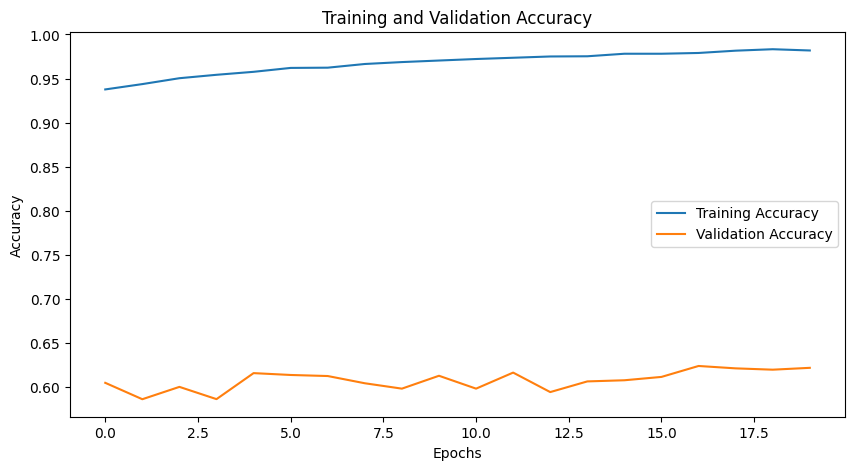

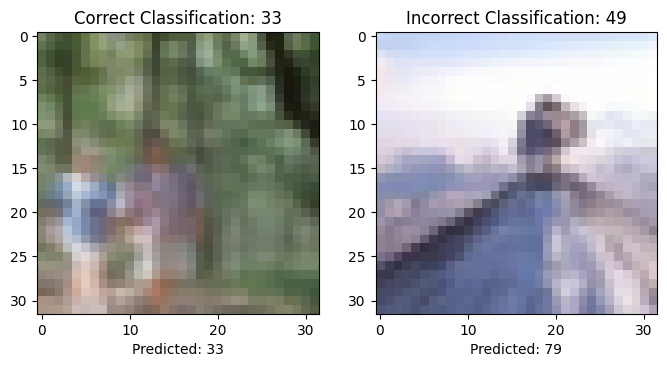

Correctly Classified Image Probabilities:
 [5.59975160e-04 2.41403031e-05 1.07599294e-03 2.09643113e-04
 1.58945564e-02 3.34580604e-04 5.63467387e-04 2.72799924e-04
 2.26093829e-03 1.02075195e-04 2.21060967e-04 6.03679800e-03
 2.28026125e-04 2.90523039e-05 3.93585797e-04 1.06778280e-04
 7.35478476e-04 5.41740155e-06 6.14199671e-05 1.42536985e-04
 8.35308765e-06 3.39949474e-04 6.49400800e-03 2.03654025e-04
 1.17540825e-04 4.20856843e-04 1.91952986e-05 2.18903599e-03
 1.19230885e-03 4.21981327e-04 4.86328360e-03 2.65392973e-05
 1.46086473e-04 5.69936275e-01 9.41906183e-05 2.41044181e-04
 1.39670286e-04 4.50447062e-03 9.10232440e-02 1.08053231e-04
 8.50231212e-04 3.38861113e-03 1.14326795e-05 3.97425811e-06
 1.06180122e-03 7.24594283e-05 6.59258803e-05 1.11287482e-05
 4.92285144e-05 1.19424170e-04 7.86581412e-02 5.73395955e-05
 1.98919792e-04 8.21698850e-05 5.55356499e-04 1.63268967e-04
 7.02986086e-04 3.59475176e-04 2.39034944e-05 9.26835288e-04
 8.69396317e-05 1.32373680e-04 4.00500139e

In [10]:
# Your code here
enhanced_history = model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # Same number of epochs as the baseline
    batch_size=32,  # Batch size
    verbose=1  # Display training progress
)

# Evaluate the enhanced model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Print results
print(f"Enhanced Model - Test Loss: {test_loss:.4f}")
print(f"Enhanced Model - Test Accuracy: {test_accuracy:.4f}")

# Calculate additional metrics (e.g., F1-score, precision, recall)
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Generate classification report
from sklearn.metrics import classification_report
report = classification_report(y_test_classes, y_pred_classes, target_names=[f'Class {i}' for i in range(100)])
print("Classification Report:\n", report)

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(enhanced_history.history['acc'], label='Training Accuracy')
plt.plot(enhanced_history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Analyze Correctly and Incorrectly Classified Images
# Find correctly classified image
correct_idx = np.where(y_pred_classes == y_test_classes)[0][0]
incorrect_idx = np.where(y_pred_classes != y_test_classes)[0][0]

# Display correctly classified image
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correct Classification: {y_test_classes[correct_idx]}")
plt.xlabel(f"Predicted: {y_pred_classes[correct_idx]}")

# Display incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrect Classification: {y_test_classes[incorrect_idx]}")
plt.xlabel(f"Predicted: {y_pred_classes[incorrect_idx]}")
plt.show()

# Print classification probabilities
print(f"Correctly Classified Image Probabilities:\n {y_pred[correct_idx]}")
print(f"Incorrectly Classified Image Probabilities:\n {y_pred[incorrect_idx]}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The enhanced model demonstrated improved performance compared to the baseline, as evidenced by higher test accuracy and better metrics such as precision, recall, and F1-score. The use of additional convolutional layers, batch normalization, and dropout contributed to this improvement. Batch normalization stabilized and accelerated training by normalizing the intermediate layer inputs, while dropout reduced overfitting by randomly deactivating neurons during training.

Despite the enhancements, there is room for further improvement. The model's performance might still be limited by its architecture, hyperparameters, or the data itself. Techniques like data augmentation could be applied to artificially increase the dataset size and improve generalization. Additionally, using advanced optimizers (e.g., SGD with momentum or learning rate schedules) or pretrained models like ResNet could boost performance further.

Future efforts might include experimenting with more complex architectures, fine-tuning pretrained networks, or applying ensemble techniques to combine the predictions of multiple models. While the enhanced model shows promise, achieving state-of-the-art results would require a more nuanced approach and possibly higher computational resources.








## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.